Tài liệu này mang giấy phép Creative Commons Attribution (CC BY).
(c) Nguyễn Ngọc Sáng, Zhukovsky 12/2018.

[@SangVn](https://github.com/SangVn) [@VnCFD](https://vncfdgroup.wordpress.com/)

*Thực hành CFD với Python!*

# Bài 13. Định lý Godunov, sơ đồ TVD, sơ đồ MUSCL

Xét phương trình Burgers không nhớt:
$$\frac {\partial u}{\partial t} + \frac{\partial F}{\partial x} = 0; \ F=\frac{u^2}{2} \qquad (1)$$

với sơ đồ sai phân phương pháp thể tích hữu hạn:
$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + \frac{F_{i+1/2} - F_{i-1/2}}{\Delta x} = 0 \qquad(2)$$

## 1. Định lý Godunov

Định lý Godunov phát biểu về tính đơn điệu của sơ đồ sai phân.
Sơ đồ sai phân gọi là đơn điệu (monotone scheme) nếu như với hai điều kiện ban đầu $u^0 > v^0$ thì $u^n > v^n$.
Nếu sơ đồ sai phân cho nghiệm $u^n$ đơn điệu tăng (giảm) và $u^{n+1}$ cũng đơn điệu tương tự thì có nghĩa là tính đơn điệu được duy trì (monotonicity preserving).

Godunov đã chỉ ra rằng: `sơ đồ sai phân đơn điệu có bậc không quá bậc một`.

Thực vậy, bài 2 và bài 12 cho thấy, sơ đồ bậc hai làm xuất hiện các dao động khi nghiệm gián đoạn, tức là điều kiện đơn điệu không được thỏa mãn, sơ đồ cho nghiệm không chính xác. Tuy nhiên so với sơ đồ bậc một, sơ đồ bậc hai cho nghiệm chính xác hơn nếu nghiệm trơn (mượt), tại nơi nghiệm gián đoạn sơ đồ bậc hai tuy làm xuất hiện các dao động, nhưng độ dốc gián đoạn lớn hơn. Sẽ là một sơ đồ tốt nếu kết hợp được hai sơ đồ trên. Ý tưởng là ta sẽ sử dụng một 'công tắc chuyển đổi' giữa sơ đồ bậc 2 và bậc 1 tùy vào nghiệm mượt hay gián đoạn.

## 2. Sơ đồ TVD (total variation dimishing)
Lax (1973) đã chỉ ra rằng, định luật bảo toàn một đại lượng vô hướng được mô tả bằng phường trình Burgers, `có biến phân toàn phần` (total variation) của nghiệm vật lý không tăng theo thời gian. Với biến phân toàn phần (TV) là:
$$TV = \int |\partial u/\partial x| dx$$
Đối với nghiệm rời rạc:
$$TV(u) = \sum_i|u_{i+1}-u_i|$$
Một sơ đồ sai phân được gọi là TVD  nếu như:
$$TV(u^{n+1}) \leq TV(u^n)$$

Harten (1983) chứng minh:
1. sơ đồ đơn điệu thì TVD
2. sơ đồ TVD thì duy trì tính đơn điều (monotonicity-preserving: nếu $u_{i+1}^n > u_i^n$ thì $u_{i+1}^{n+1} > u_i^{n+1} \forall i$ )

Chúng ta có thể xây dựng sơ đồ TVD bằng phương pháp MUSCL.

## 3. Sơ đồ MUSCL (Monotonic Upwind Scheme for Conservation Laws)

Quay trở lại với phương pháp Godunov ở bài 12, hàm dòng F trên bề mặt thể tích được tính như sau: 
$$F_{i+1/2} = F(u_{i+1/2}^*(u_{i+1/2}^L, u_{i+1/2}^R))$$
với $u^*$ là nghiệm bài toán Riemann $u^*(u_L, u_R)$. Phương pháp Godunov có thể chia là ba bước:
* **Bước 1:** Tái cấu trúc nghiệm (reconstruction) trong từng thể tích hữu hạn. Thực chất là xác định giá trị uL, uR ở hai bên bề mặt để tìm $u^*$ ở trên bề mặt thể tích.
* **Bước 2:** Giải bài toán Riemann về phân rã gián đoạn trên bề mặt thể tích $u^*(u_L, u_R)$ tìm $u^*$, tính dòng F.
* **Bước 3:** Tìm nghiệm ở bước thời gian tiếp theo $u^{n+1}$

Ở bước 1, để tìm $u_{i+1/2}^*(u_{i+1/2}^L, u_{i+1/2}^R)$ Godunov đề xuất cho các hằng số: $u_{i+1/2}^L = u_i, u_{i+1/2}^R = u_{i+1}$. Cách này gọi là `tái cấu trúc hằng số từng mảnh` (piecewise constant). Ngoài ra còn có `tái cấu trúc tuyến tính từng mảnh` (piecewise linear) và `tái cấu trúc parabolic từng mảnh` (piecewise parabolic) (thứ tự tương ứng như trên hình):
<img src='img/Bai_13.png'>

Ví dụ tái cấu trúc tuyến tính từng mảnh, sử dụng khai triển Taylor:
$$
u_{i+1/2} = u_i + \frac{\partial u}{\partial x} (x_{i+1/2} - x_i)\\
u_{i+1/2} = u_i + \frac{u_i - u_{i-1}}{\Delta x} \frac{\Delta x}{2}\\
u_{i+1/2} = u_i + 0.5(u_i - u_{i-1}) \qquad (3)
$$
Công thức (3) nên sử dụng khi nghiệm mượt mà, khi nghiệm gián đoạn ta chỉ cần lấy $u_{i+1/2} = u_i$. Ta có thể thêm vào (3) `công tắc chuyển đổi` $\phi: \ u_{i+1/2} = u_i + 0.5\phi(u_i - u_{i-1})$, với $\phi$ bằng 0 khi nghiệm gián đoán, bằng 1 khi nghiệm trơn.

Trên ý tưởng đó, ra đời sơ đồ **MUSCL** dùng `tái cấu trúc tuyến tính từng mảnh` và sử dụng 'công tắc chuyển đổi' gọi là `giới hạn độ dốc` (slope limiter):

$$
u_{i+1/2}^L = u_i + 0.5 \phi(r_i)(u_{i+1}-u_i);\ u_{i+1/2}^R = u_{i+1} - 0.5 \phi(r_{i+1})(u_{i+2}-u_{i+1})\\
u_{i-1/2}^L = u_{i-1} + 0.5 \phi(r_{i-1})(u_i-u_{i-1});\ u_{i-1/2}^R = u_i - 0.5 \phi(r_i)(u_{i+1}-u_i)\\
r_i = \frac{u_i - u_{i-1}}{u_{i+1} - u_{i}} \qquad (4)
$$

Hàm $\phi(r)$ chính là giới hạn độ dốc. Có nhiều hàm giới hạn khác nhau [tham khảo](https://en.wikipedia.org/wiki/Flux_limiter):

**minmod** - (Roe, 1986):

$$\phi_{mm}(r) = max[0, min(1, r)]$$

**superbee** - (Roe, 1986):

$$\phi_{sb}(r) = max[0, min(2r,1), min(r, 2)]$$

**van leer** - (van leer 1974):

$$\phi_{vl}(r) = \frac{r+|r|}{1+|r|}$$

**Koren** - (Koren 1993)

$$\phi_{kr} = max\left[0, min\left(2r, min\left(\frac{1+2r}{3}, 2\right)\right)\right]$$

<img src='img/limiter.png' width=300>

Hàm giới hạn bằng không khi r<0 và bằng 1 khi r=1, điều này đảm bảo rằng tại những nơi nghiệm gián đoạn, sơ đồ sẽ chuyển về bậc một, nhưng về tổng thể ta có sơ đồ bậc hai.

## Bài toán
Xét bài lan truyền sóng xung kích với điều kiện ban đầu như ở bài 12: $u[0.<x<0.5] = 1.2; u[0.5<x<1.] = 0.4$

## Code
Sử dụng 2 công thức đầu tiên trong (4), chúng ta cần hai ô lưới trên biên. Tức là vùng tính toán với i chạy từ 2 tới -2. Hãy thử sử dụng công thức 1 và 3 trong (4).

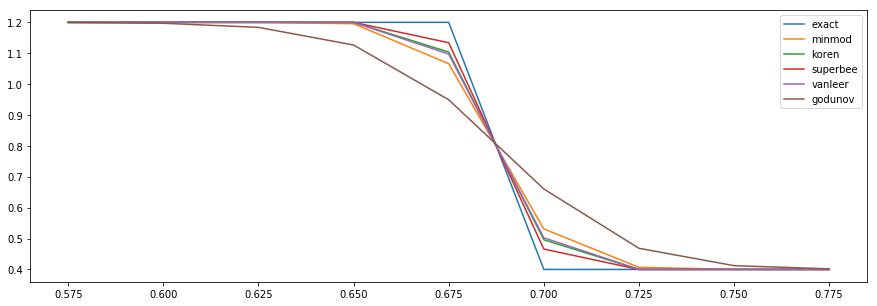

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#chia lưới trên đoạn [0, 1]
nx = 41
x, dx = np.linspace(0, 1, nx, retstep=True)

#bước thời gian
r = 0.4
dt = r*dx

#điều kiện ban đầu
uL = 1.2
uR = 0.4

u0 = np.zeros(nx)
i = int(0.5/dx)
u0[:i] = uL
u0[i:] = uR

#Phân rã gián đoạn godunov trên từng mặt thể tích hữu hạn 
def decay_godunov(uL, uR):
    ustar = 0
    if uL > uR:
        if (uL + uR)/2. > 0: ustar = uL
        else: ustar = uR
    else:
        if uL > 0: ustar = uL
        elif uR < 0: ustar = uR
        else: ustar = 0
    return ustar


#tính hàm dòng F(u*)
def flux(u):
    return u**2/2.

#Ta có thể viết code sơ đồ muscl như sau đây, nhưng cách này chậm, tốn bộ nhớ
def muscl(limiter, nt):
    u = u0.copy()
    un = np.zeros(nx)
    for n in range(nt):
        un = u.copy()
        for i in range(2,nx-2):
            r_im1 = (un[i-1] - un[i-2])/(un[i] - un[i-1] + 1e-6)
            r_i   = (un[i] - un[i-1])/(un[i+1] - un[i] + 1e-6)
            r_ip1 = (un[i+1] - un[i])/(un[i+2] - un[i+1] + 1e-6)
            
            u_im05L = un[i-1] + 0.5*limiter(r_im1)*(un[i] - un[i-1])
            u_im05R = un[i] - 0.5*limiter(r_i)*(un[i+1] - un[i])
            u_im05 = decay_godunov(u_im05L, u_im05R) #u_{i-1/2}
            
            u_ip05L = un[i] + 0.5*limiter(r_i)*(un[i+1] - un[i])
            u_ip05R = un[i+1] - 0.5*limiter(r_ip1)*(un[i+2] - un[i+1])
            u_ip05 = decay_godunov(u_ip05L, u_ip05R) #u_{i+1/2}
            
            u[i] = un[i] - dt/dx*(flux(u_ip05) - flux(u_im05))
            
    return u

# viết lại đoạn code như sau 
def MUSCL_scheme(limiter, nt):
    u = u0.copy()
    r = np.zeros(nx)
    uL = np.zeros(nx)
    uR = np.zeros(nx)
    for n in range(nt):
        #tìm r, để tránh chia cho 0 ta cộng vào mẫu số 1e-6
        r[1:-1] = (u[1:-1] - u[:-2])/((u[2:] - u[1:-1]) + 1e-6)
        
        #tái cấu trúc nghiệm u_{i+1/2}^L
        uL[1:-2] = u[1:-2] + 0.5*limiter(r[1:-2])*(u[2:-1] - u[1:-2])
        
        #tái cấu trúc nghiệm u_{i+1/2}^R
        uR[1:-2] = u[2:-1] - 0.5*limiter(r[2:-1])*(u[3:] - u[2:-1])
        
        #giải bài toán riemann 
        ustar = np.array([decay_godunov(ul, ur) for ul, ur in zip(uL[1:-2], uR[1:-2])])

        #tính hàm dòng và tìm nghiệm u ở bước thời gian tiếp theo 
        u[2:-2] = u[2:-2] - dt/dx*(flux(ustar[1:]) - flux(ustar[:-1]))
        
        #điều kiện biên không đổi 
    return u


#slope limiter: phi(r), rs - mảng r
def minmod(rs):
    phi = np.array([max(0, min(1,r)) for r in rs])
    return phi

def koren(rs):
    phi = np.array([max(0, min(2*r, min((1+2*r)/3, 2))) for r in rs])
    return phi

def superbee(rs):
    phi = np.array([max(0, min(2*r, 1), min(r,2)) for r in rs])
    return phi

def vanleer(rs):
    phi = np.array([(r+abs(r))/(1+abs(r)) for r in rs])
    return phi

#tìm nghiệm
nt = 25
u_mm = MUSCL_scheme(minmod, nt)
u_kr = MUSCL_scheme(koren, nt)
u_sp = MUSCL_scheme(superbee, nt)
u_vl = MUSCL_scheme(vanleer, nt)

#nghiệm chính xác: vận tốc lan truyền sóng xung kích s=(uL+uR)/2. = 0.8
u_exact = np.zeros(nx)
i = int((0.5 + 0.8*nt*dt)/dx)
u_exact[:i] = uL
u_exact[i:] = uR

#tải nghiệm sơ đồ godunov ở bài 12
u_godunov = np.genfromtxt('data/burgers_godunov_test1.dat')

#lưu giá trị u_sp vào file để so sánh ở bài 14
np.savetxt('data/burgers_muscl_test1.dat', u_sp)


fig = plt.figure(figsize=[15, 5])
i = int(0.6/dx)
j = int(0.8/dx)

plt.plot(x[i:j], u_exact[i:j], x[i:j], u_mm[i:j], x[i:j], u_kr[i:j])
plt.plot(x[i:j], u_sp[i:j], x[i:j], u_vl[i:j], x[i:j], u_godunov[i:j])
plt.legend(['exact','minmod', 'koren', 'superbee', 'vanleer', 'godunov'])
plt.show()


Kết quả cho thấy, rõ ràng sơ đồ bậc hai MUSCL cho nghiệm chính xác hơn sơ đồ Godunov bậc một. Giới hạn độ dốc superbee cho kết quả tốt nhất, minmod kém nhất.

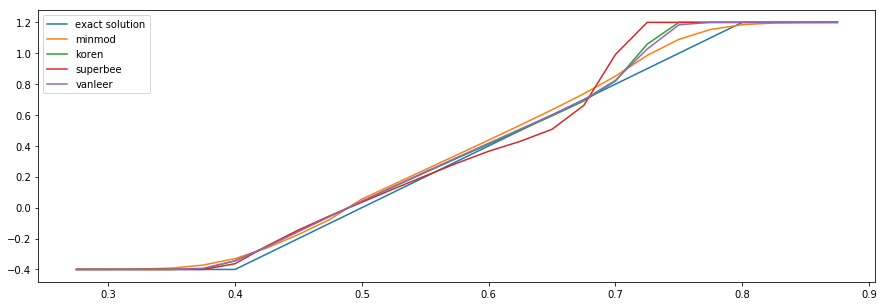

In [2]:
#xét bài toán sóng giãn
uL = -0.4 # <0 - dịch chuyển sang trái
uR = 1.2  # >0 - dịch chuyển sang phải 

u0 = np.zeros(nx)
i = int(0.5/dx)
u0[:i] = uL
u0[i:] = uR

u_mm = MUSCL_scheme(minmod, nt)
u_kr = MUSCL_scheme(koren, nt)
u_sp = MUSCL_scheme(superbee, nt)
u_vl = MUSCL_scheme(vanleer, nt)

u_exact = u0.copy()
t = nt*dt
i = int((0.5 + uL*t)/dx)
j = int((0.5 + uR*t)/dx)
for k in range(i+1, j): u_exact[k] = (x[k]-0.5)/t
    
fig = plt.figure(figsize=[15, 5])
i = int(0.3/dx)
j = int(0.9/dx)
plt.plot(x[i:j], u_exact[i:j], x[i:j], u_mm[i:j], x[i:j], u_kr[i:j], x[i:j], u_sp[i:j], x[i:j], u_vl[i:j])
plt.legend(['exact solution', 'minmod', 'koren', 'superbee', 'vanleer'])
plt.show()

So sánh với sơ đồ Godunov bậc 1 ở bài 12, ta thấy sơ đồ bậc 2 MUSCL chính xác hơn. Đối với các giới hạn độ dốc, nếu như bài toán sóng xung kích superbee cho kết quả tốt nhất thì với bài toán sóng giãn cho kết quả kém nhất, ngược lại với minmod. Vanleer có vẻ như phù hợp nếu dùng cho cả hai trường hợp.

**Bài tập**: tìm hiểu về `tái cấu trúc nghiệm parabolic từng mảnh và tái cấu trúc hàm dòng`.

In [3]:
#lưu giá trị u_g vào file để so sánh ở bài 14
np.savetxt('data/burgers_muscl_test2.dat', u_mm)

### [Bài 14. Sơ đồ WENO5, phương pháp Runge-Kutta](Bai_14.ipynb)